
# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   Year   Jan   Feb   Mar   Apr   May    Jun    Jul    Aug    Sep    Oct  \
0  1880 -0.19 -0.25 -0.09 -0.17 -0.10  -0.21  -0.18  -0.11  -0.15  -0.24   
1  1881 -0.20 -0.15  0.03  0.05  0.05  -0.19      0  -0.04  -0.16  -0.22   
2  1882  0.16  0.13  0.04 -0.16 -0.14  -0.22  -0.17  -0.08  -0.15  -0.24   
3  1883 -0.30 -0.37 -0.13 -0.19 -0.18  -0.08  -0.08  -0.14  -0.23  -0.12   
4  1884 -0.13 -0.09 -0.37 -0.40 -0.34  -0.35  -0.31  -0.28  -0.28  -0.25   

     Nov    Dec  
0  -0.22  -0.18  
1  -0.19  -0.08  
2  -0.17  -0.36  
3  -0.24  -0.11  
4  -0.34  -0.31  
              Year         Jan         Feb         Mar         Apr         May
count   144.000000  144.000000  144.000000  144.000000  144.000000  144.000000
mean   1951.500000    0.063333    0.070903    0.088889    0.063681    0.052917
std      41.713307    0.423598    0.428513    0.433790    0.396609    0.377894
min    1880.000000   -0.810000   -0.630000   -0.630000   -0.580000   -0.550000
25%    1915.750000   -0.240000   -0.2400

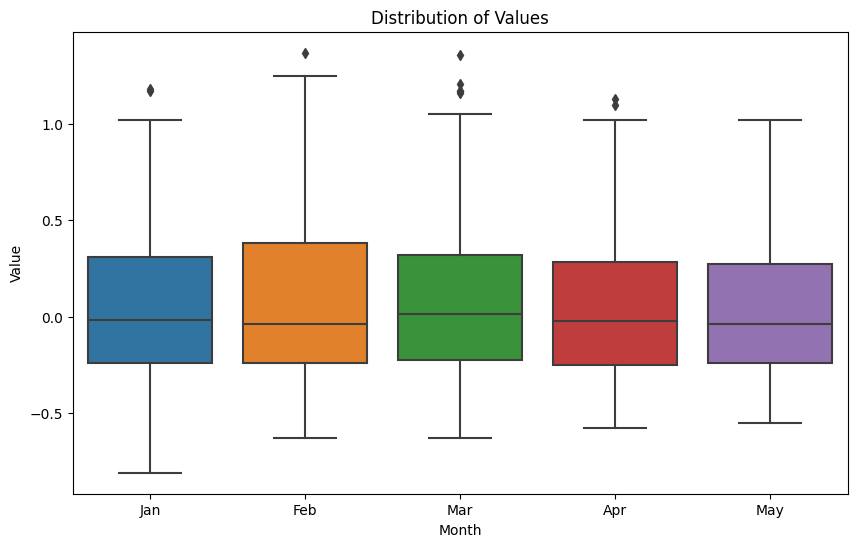

<ipython-input-2-9c7baed48b52>:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data['Average'] = data.iloc[:, 1:].mean(axis=1)


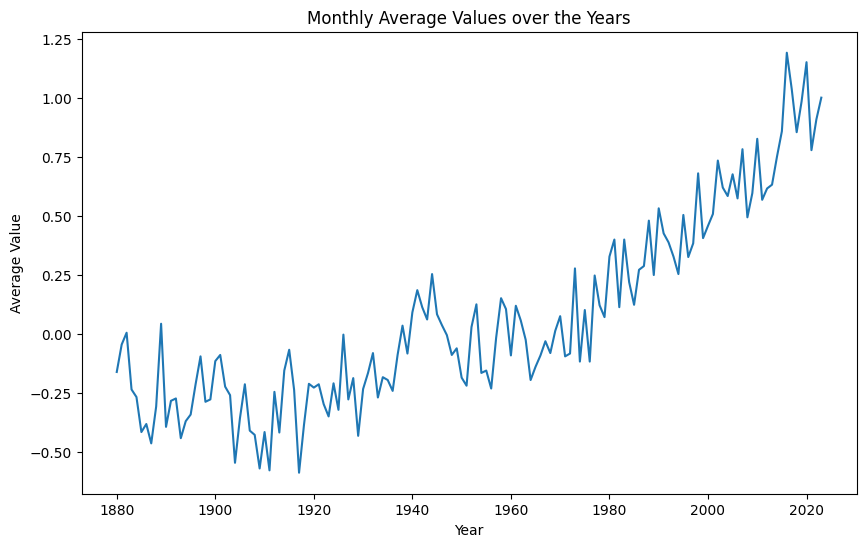

<ipython-input-2-9c7baed48b52>:37: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.iloc[:, 1:].corr()


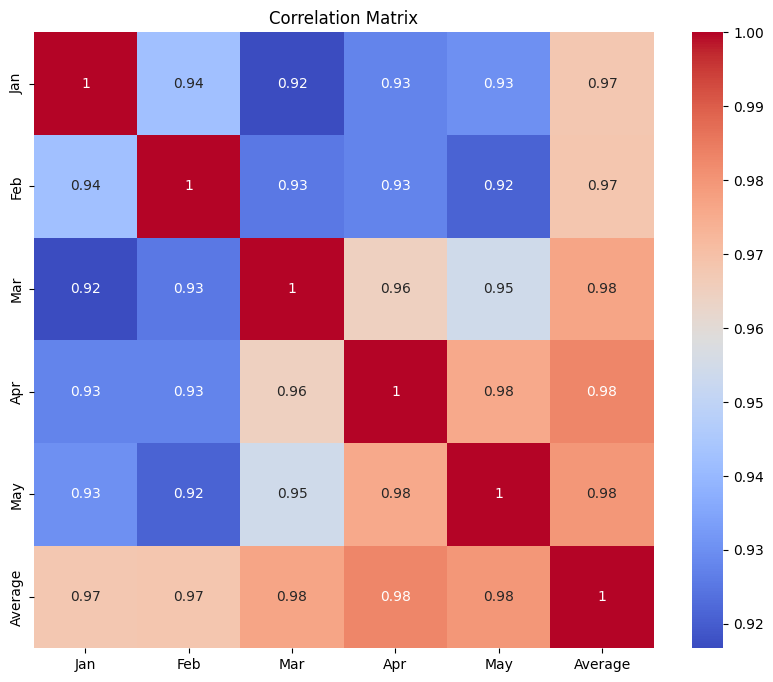

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/GLB.Ts+ dSST.csv')

# Display the first few rows of the DataFrame
print(data.head())

# Check the basic statistics of the data
print(data.describe())

# Check the data types of the columns
print(data.dtypes)

# Visualize the distribution of the data
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.iloc[:, 1:])
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Distribution of Values')
plt.show()

# Calculate the monthly averages
data['Average'] = data.iloc[:, 1:].mean(axis=1)

# Plot the monthly averages over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Average')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Monthly Average Values over the Years')
plt.show()

# Calculate the correlation matrix
corr_matrix = data.iloc[:, 1:].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/GLB.Ts+ dSST.csv')

# Convert non-numeric values to NaN
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Extract the independent variable (Year) and dependent variables (Months)
X = data['Year'].values.reshape(-1, 1)
y = data[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients (intercept and slopes)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: [-16.55229374 -16.29411139 -16.71132892 -15.49709437 -14.94392483
 -15.02562798 -13.97892835 -14.56296181 -14.41706729 -14.41739523
 -14.74313458 -15.02160884]
Coefficients: [[0.00851358]
 [0.00838475]
 [0.00860706]
 [0.00797244]
 [0.00768357]
 [0.00771849]
 [0.00719365]
 [0.00749224]
 [0.0074194 ]
 [0.0074329 ]
 [0.00759656]
 [0.007726  ]]


In [ ]:
# Calculate R-squared (coefficient of determination)
r_squared = model.score(X, y)
print('R-squared:', r_squared)


R-squared: 0.7118141245482885


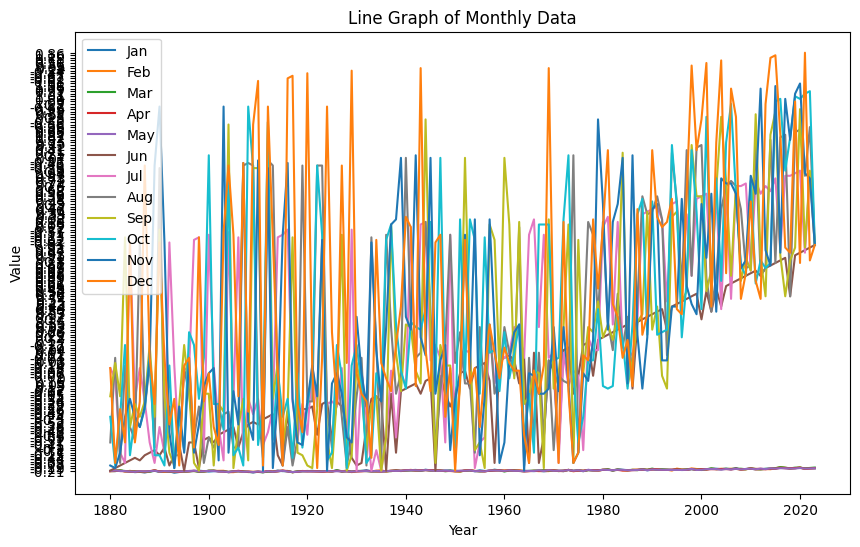

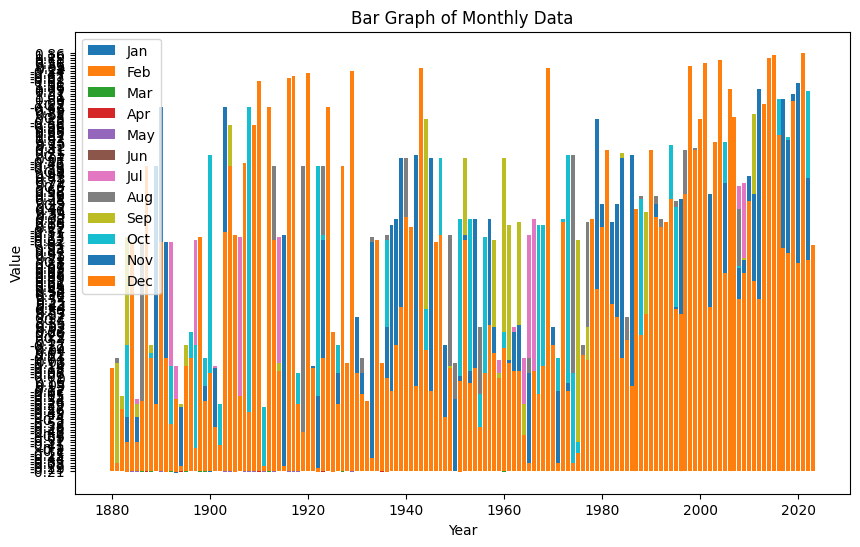

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/GLB.Ts+ dSST.csv')

# Drop rows with missing values
data.dropna(inplace=True)

# Extract the Year column
years = data['Year']

# Extract the monthly data columns (Jan to Dec)
months = data.columns[1:]

# Create line graph
plt.figure(figsize=(10, 6))
for month in months:
    plt.plot(years, data[month], label=month)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Graph of Monthly Data')
plt.legend()
plt.show()

# Create bar graph
plt.figure(figsize=(10, 6))
for month in months:
    plt.bar(years, data[month], label=month)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Bar Graph of Monthly Data')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Msc IT Project/GLB.Ts+ dSST.csv')

# Specify the column names
col_names = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert columns to numeric types
df[col_names[1:]] = df[col_names[1:]].apply(pd.to_numeric, errors='coerce')

# Set the 'Year' column as the index
df.set_index('Year', inplace=True)

# Apply exponential smoothing to each column`
alpha = 0.2  # Smoothing factor
for col in col_names[1:]:
    df[col] = df[col].ewm(alpha=alpha, adjust=False).mean()

# Reset the index
df.reset_index(inplace=True)

# Print the resulting DataFrame
print(df)


     Year       Jan       Feb       Mar       Apr       May       Jun  \
0    1880 -0.190000 -0.250000 -0.090000 -0.170000 -0.100000 -0.210000   
1    1881 -0.192000 -0.230000 -0.066000 -0.126000 -0.070000 -0.206000   
2    1882 -0.121600 -0.158000 -0.044800 -0.132800 -0.084000 -0.208800   
3    1883 -0.157280 -0.200400 -0.061840 -0.144240 -0.103200 -0.183040   
4    1884 -0.151824 -0.178320 -0.123472 -0.195392 -0.150560 -0.216432   
..    ...       ...       ...       ...       ...       ...       ...   
139  2019  0.848064  0.877621  0.967121  0.859588  0.801376  0.752152   
140  2020  0.914451  0.952097  1.007697  0.913670  0.845101  0.785721   
141  2021  0.893561  0.889677  0.984158  0.882936  0.834081  0.796577   
142  2022  0.896849  0.891742  0.997326  0.874349  0.835264  0.823262   
143  2023  0.891479  0.909394  1.039861  0.899479  0.856212  0.823262   

          Jul       Aug       Sep       Oct       Nov       Dec  
0   -0.180000 -0.110000 -0.150000 -0.240000 -0.220000 -0.

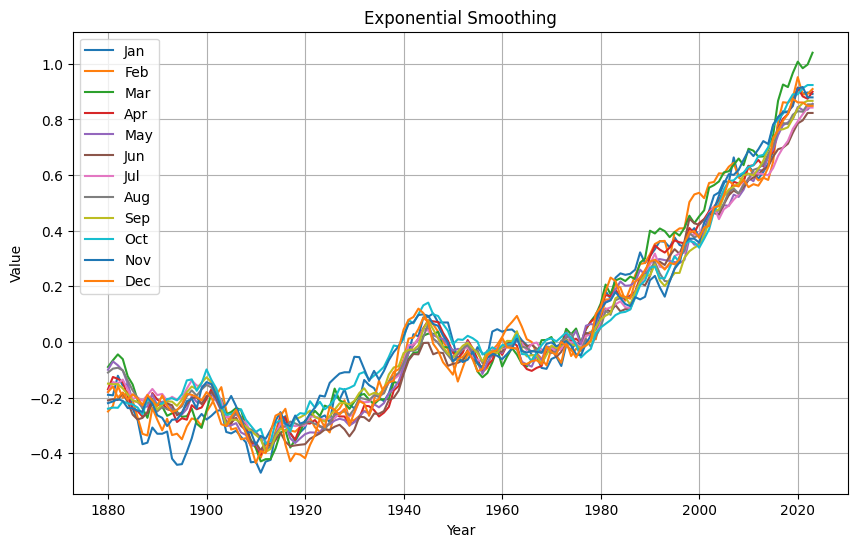

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Msc IT Project/GLB.Ts+ dSST.csv')

# Specify the column names
col_names = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert columns to numeric types
df[col_names[1:]] = df[col_names[1:]].apply(pd.to_numeric, errors='coerce')

# Set the 'Year' column as the index
df.set_index('Year', inplace=True)

# Apply exponential smoothing to each column
alpha = 0.2  # Smoothing factor
for col in col_names[1:]:
    df[col] = df[col].ewm(alpha=alpha, adjust=False).mean()

# Reset the index
df.reset_index(inplace=True)

# Plot the line graph
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot each column as a line
for col in col_names[1:]:
    plt.plot(df['Year'], df[col], label=col)

plt.xlabel('Year')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.title('Exponential Smoothing')  # Set the title
plt.legend()  # Show the legend
plt.grid(True)  # Show grid lines
plt.show()  # Display the graph


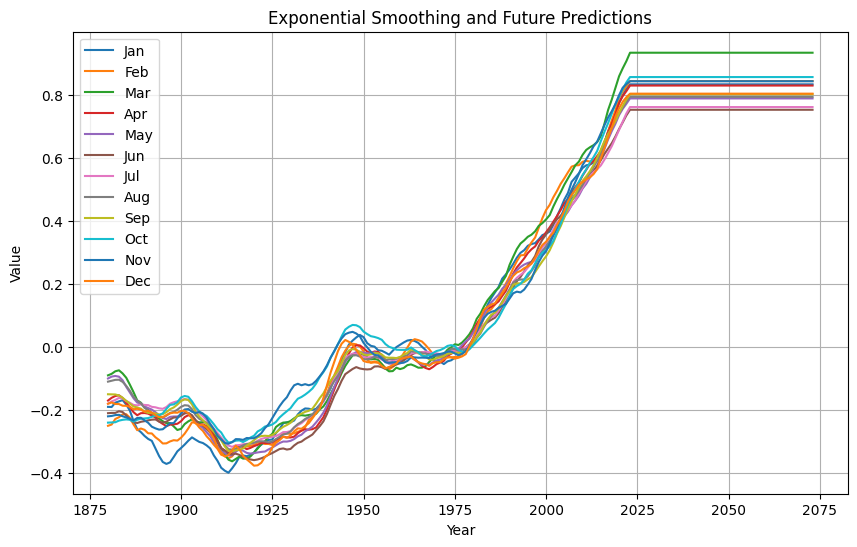

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Msc IT Project/GLB.Ts+ dSST.csv')

# Specify the column names
col_names = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert columns to numeric types
df[col_names[1:]] = df[col_names[1:]].apply(pd.to_numeric, errors='coerce')

# Set the 'Year' column as the index
df.set_index('Year', inplace=True)

# Apply exponential smoothing to each column
alpha = 0.2  # Smoothing factor
for col in col_names[1:]:
    df[col] = df[col].ewm(alpha=alpha, adjust=False).mean()

# Extend the index for future predictions
last_year = df.index[-1]
future_years = pd.RangeIndex(start=last_year + 1, stop=last_year + 51, name='Year')
df = df.reindex(df.index.union(future_years))

# Make future predictions using exponential smoothing
for col in col_names[1:]:
    df[col] = df[col].ewm(alpha=alpha, adjust=False).mean()

# Reset the index
df.reset_index(inplace=True)

# Plot the line graph
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot each column as a line
for col in col_names[1:]:
    plt.plot(df['Year'], df[col], label=col)

plt.xlabel('Year')  # Set the x-axis label
plt.ylabel('Value')  # Set the y-axis label
plt.title('Exponential Smoothing and Future Predictions')  # Set the title
plt.legend()  # Show the legend
plt.grid(True)  # Show grid lines
plt.show()  # Display the graph


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/GLB.Ts+ dSST.csv')

# Convert the 'Year' column to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set the 'Year' column as the index
data.set_index('Year', inplace=True)

# Extract the columns for analysis
columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Fill missing values with NaN
data[columns] = data[columns].apply(pd.to_numeric, errors='coerce')

# Perform Holt's Linear Exponential Smoothing for each column
predictions = pd.DataFrame(index=pd.date_range(start='2020', end='2070', freq='AS'))
for column in columns:
    column_data = data[column].dropna()

    # Train the Holt's Linear Exponential Smoothing model
    model = ExponentialSmoothing(column_data, trend='add', seasonal=None)
    fitted_model = model.fit()

    # Generate future predictions from 2020 to 2070
    future_predictions = fitted_model.predict(start='2020', end='2070')

    # Add predictions to the DataFrame
    predictions[column] = future_predictions

# Print the predictions for 2020 to 2070
print(predictions)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

                 Jan       Feb       Mar       Apr       May       Jun  \
2020-01-01  0.899909  0.934585  1.059639  0.953710  0.891584  0.834764   
2021-01-01  0.971062  1.008700  1.104703  1.017690  0.942908  0.872811   
2022-01-01  0.943157  0.956175  1.085768  0.964130  0.921271  0.881721   
2023-01-01  0.943972  0.960511  1.100705  0.945412  0.917092  0.910903   
2024-01-01  0.935623  0.978759  1.144321  0.974762  0.939619  0.928303   
2025-01-01  0.943884  0.993447  1.167055  0.989539  0.956320  0.945703   
2026-01-01  0.952144  1.008134  1.189789  1.004316  0.973022  0.963103   
2027-01-01  0.960404  1.022821  1.212523  1.019093  0.989723  0.980503   
2028-01-01  0.968665  1.037508  1.235257  1.033870  1.006424  0.997903   
2029-01-01  0.976925  1.052196  1.257991  1.048647  1.023126  1.015303   
2030-01-01  0.985186  1.066883  1.280725  1.063424  1.039827  1.032703   
2031-01-01  0.993446  1.081570  1.303459  1.078200  1.056528  1.050102   
2032-01-01  1.001707  1.096257  1.3261

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

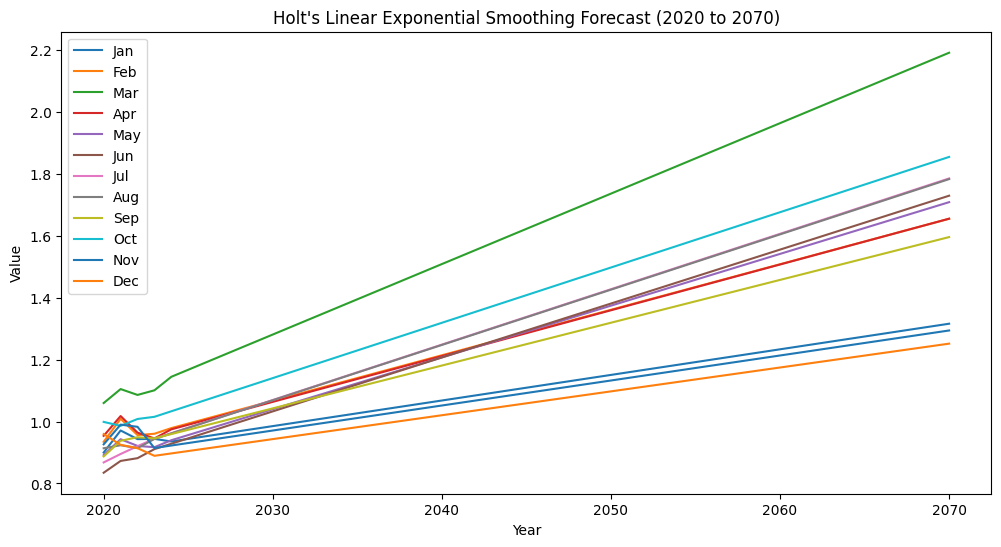

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/GLB.Ts+ dSST.csv')

# Convert the 'Year' column to datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set the 'Year' column as the index
data.set_index('Year', inplace=True)

# Extract the columns for analysis
columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Fill missing values with NaN
data[columns] = data[columns].apply(pd.to_numeric, errors='coerce')

# Perform Holt's Linear Exponential Smoothing for each column
predictions = pd.DataFrame(index=pd.date_range(start='2020', end='2070', freq='AS'))
for column in columns:
    column_data = data[column].dropna()

    # Train the Holt's Linear Exponential Smoothing model
    model = ExponentialSmoothing(column_data, trend='add', seasonal=None)
    fitted_model = model.fit()

    # Generate future predictions from 2020 to 2070
    future_predictions = fitted_model.predict(start='2020', end='2070')

    # Add predictions to the DataFrame
    predictions[column] = future_predictions

# Plot the predictions as a line graph
plt.figure(figsize=(12, 6))
for column in columns:
    plt.plot(predictions.index, predictions[column], label=column)
plt.title('Holt\'s Linear Exponential Smoothing Forecast (2020 to 2070)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


   Year  Glob  NHem  SHem  24N-90N  24S-24N  90S-24S  64N-90N  44N-64N  \
0  1880 -0.17 -0.30 -0.05    -0.39    -0.13    -0.01    -0.82    -0.50   
1  1881 -0.09 -0.19  0.00    -0.37     0.10    -0.07    -0.92    -0.47   
2  1882 -0.11 -0.22 -0.01    -0.33    -0.05     0.01    -1.41    -0.28   
3  1883 -0.18 -0.30 -0.07    -0.37    -0.17    -0.01    -0.19    -0.57   
4  1884 -0.29 -0.44 -0.15    -0.62    -0.15    -0.14    -1.31    -0.65   

   24N-44N  EQU-24N  24S-EQU  44S-24S  64S-44S  90S-64S  
0    -0.30    -0.15    -0.11    -0.04     0.05     0.66  
1    -0.23     0.10     0.10    -0.05    -0.07     0.59  
2    -0.18    -0.05    -0.05     0.01     0.04     0.62  
3    -0.29    -0.18    -0.16    -0.04     0.07     0.49  
4    -0.49    -0.12    -0.17    -0.19    -0.02     0.64  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     143 non-null

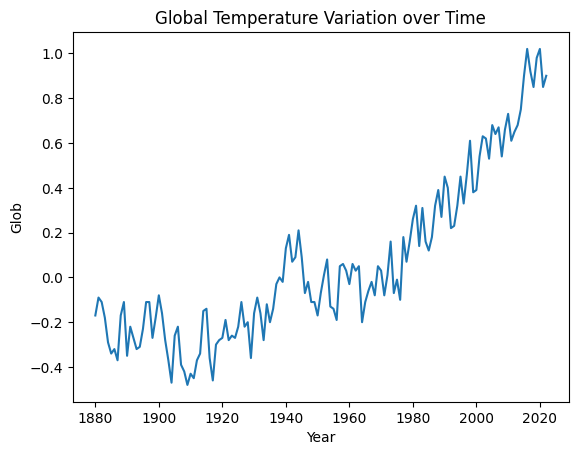

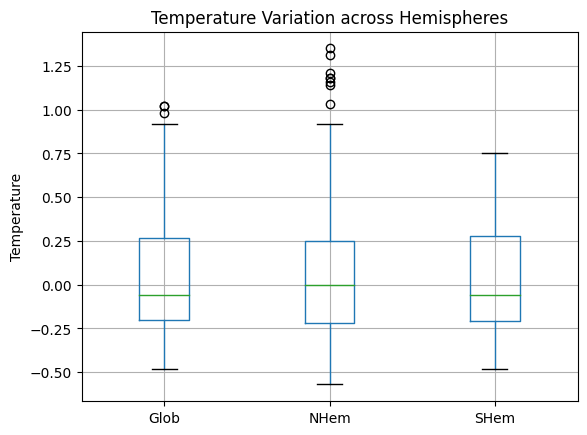

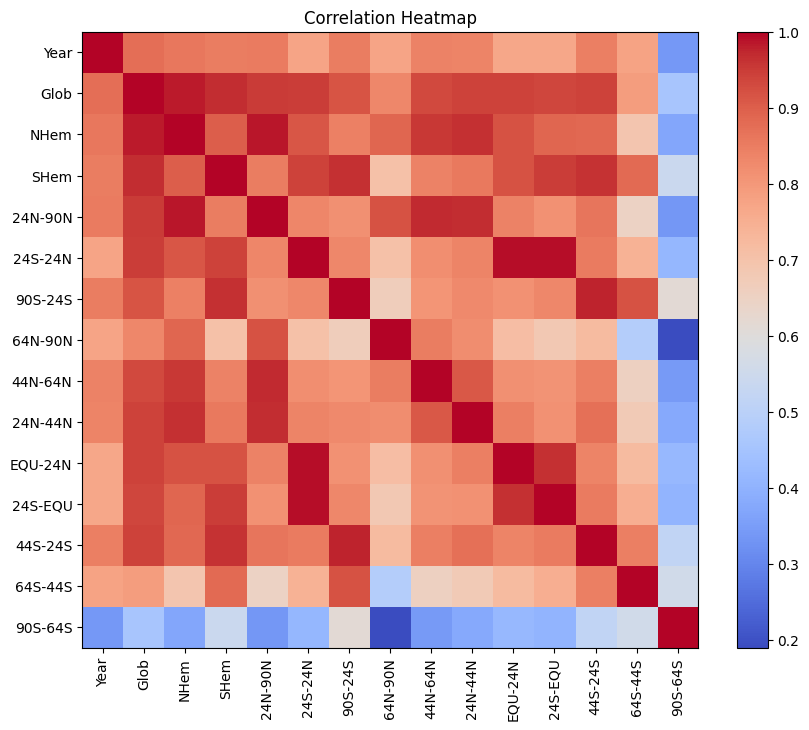

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/ZonAnn.Ts+dSST.csv')

# Step 2: Get an overview of the data
print(data.head())  # Print the first few rows
print(data.info())  # Display information about the dataset (data types, non-null values, etc.)
print(data.describe())  # Generate summary statistics of the numerical columns

# Step 3: Visualize the data
# Example: Line plot of the 'Glob' column over time
plt.plot(data['Year'], data['Glob'])
plt.xlabel('Year')
plt.ylabel('Glob')
plt.title('Global Temperature Variation over Time')
plt.show()

# Example: Box plot of the temperature columns
data[['Glob', 'NHem', 'SHem']].boxplot()
plt.ylabel('Temperature')
plt.title('Temperature Variation across Hemispheres')
plt.show()

# Example: Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/ZonAnn.Ts+dSST.csv')

# Step 2: Prepare the feature matrix and target variable
X = data.drop(['Year'], axis=1)  # Exclude non-feature columns from the feature matrix
y = data['Glob']  # Assuming 'Glob' is the target variable column

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit the SVR model
model = SVR()  # You can specify additional parameters like kernel type, C value, etc.
model.fit(X_train, y_train)

# Step 5: Predict the target variable
y_pred = model.predict(X_test)

# Step 6: Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.0019105996830217453


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/oil_spill.csv')

# Split the data into features (X) and labels (y)
X = data.drop('target', axis=1)
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LogisticRegression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9521276595744681


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


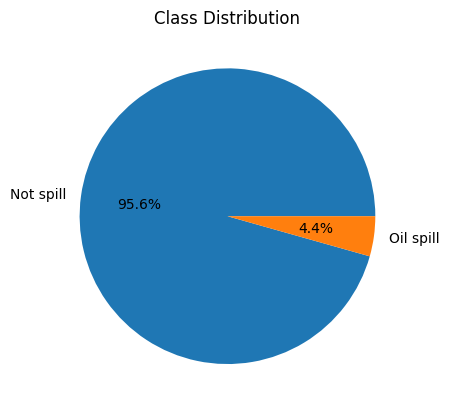

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/oil_spill.csv')

# Map the target variable values to meaningful labels
data['target'] = data['target'].map({0: 'Not spill', 1: 'Oil spill'})

# Count the number of occurrences for each class
class_counts = data['target'].value_counts()

# Create a pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')

# Display the pie chart
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/oil_spill.csv')

# Extract the feature columns and the target column
feature_columns = ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14',
                   'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27',
                   'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40',
                   'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49']
target_column = 'target'

X = data[feature_columns]
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)


Accuracy: 0.9680851063829787


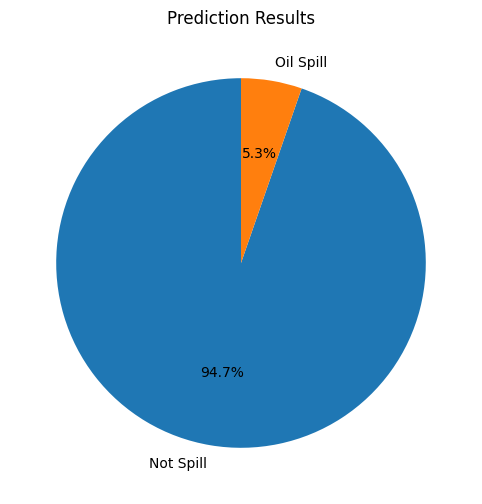

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/oil_spill.csv')

# Make predictions using the Decision Tree model
predictions = dt_classifier.predict(X_test)

# Calculate the count of each class in the predictions
class_counts = pd.Series(predictions).value_counts()

# Define labels for the pie chart
labels = ['Not Spill', 'Oil Spill']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Prediction Results')

# Display the pie chart
plt.show()


In [ ]:
#Load the CSV file into a pandas DataFrame:
import pandas as pd


data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/oil_spill.csv')

#Split the data into features (X) and the target variable (y):
X = data.drop('target', axis=1)
y = data['target']

#Split the data into training and testing sets:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the features:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train the SVM model:
from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)
#Make predictions:
y_pred = svm_model.predict(X_test_scaled)

#Define a threshold for classification:
threshold = 0.5
y_pred_class = (y_pred >= threshold).astype(int)


#Calculate accuracy:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_class)

print("Accuracy:", accuracy)



Accuracy: 0.9893617021276596


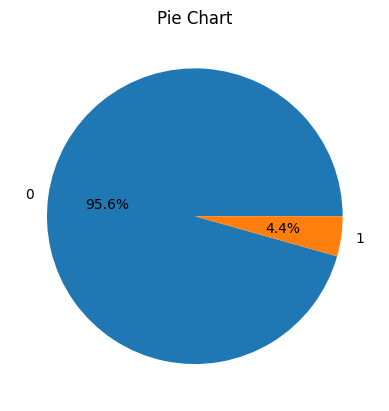

In [ ]:
import matplotlib.pyplot as plt

# Select a categorical column for the pie chart
category_column = 'target'

# Count the occurrences of each category
category_counts = data[category_column].value_counts()

# Plot the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.show()


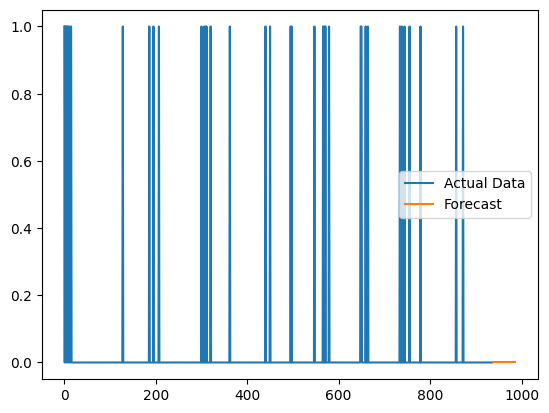

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/oil_spill.csv')

# Step 2: Prepare the data
# Assuming the 'target' column is the variable of interest
time_series = data['target']

# Step 3: Fit the SARIMA model
model = SARIMAX(time_series, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))  # Example order, tune as needed
model_fit = model.fit()

# Step 4: Predict future values
forecast_steps = 50  # Number of future time points to predict
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Step 5: Visualize the results
plt.plot(time_series, label='Actual Data')
plt.plot(forecast_values, label='Forecast')
plt.legend()
plt.show()


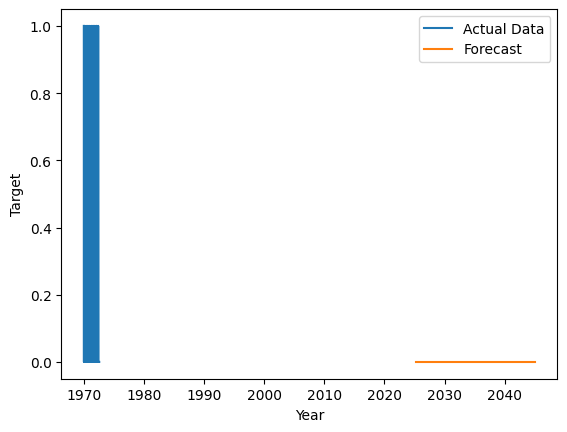

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Load and preprocess the data
data = pd.read_csv('/content/drive/MyDrive/Msc IT Project/oil_spill.csv')

# Step 2: Prepare the data
# Assuming the 'target' column is the variable of interest
time_series = data['target']

# Step 3: Fit the SARIMA model
model = SARIMAX(time_series, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))  # Example order, tune as needed
model_fit = model.fit()

# Step 4: Predict future values
forecast_steps = 20 * 4  # 20 years * 4 quarters per year
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

# Step 5: Prepare x-axis values for the future time points
start_year = data.index[-1] + 1
end_year = start_year + 20
future_quarters = pd.date_range(start=f"{2025}-01-01", periods=forecast_steps, freq='Q')

# Step 6: Plot the line graph for the future predictions
plt.plot(data.index, time_series, label='Actual Data')
plt.plot(future_quarters, forecast_values, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Target')
plt.legend()
plt.show()


Informations of DataFrame: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Observation        178080 non-null  int64  
 1    Year              178080 non-null  int64  
 2    Month             178080 non-null  int64  
 3    Day               178080 non-null  int64  
 4    Date              178080 non-null  int64  
 5    Latitude          178080 non-null  float64
 6    Longitude         178080 non-null  float64
 7    Zonal Winds       178080 non-null  object 
 8    Meridional Winds  178080 non-null  object 
 9    Humidity          178080 non-null  object 
 10   Air Temp          178080 non-null  object 
 11   Sea Surface Temp  178080 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB
None 

---------------------------------------------------------------------------------------------------- 

D

<Axes: title={'center': 'World Distribution of Buoys'}, xlabel='Longitude', ylabel='Latitude'>

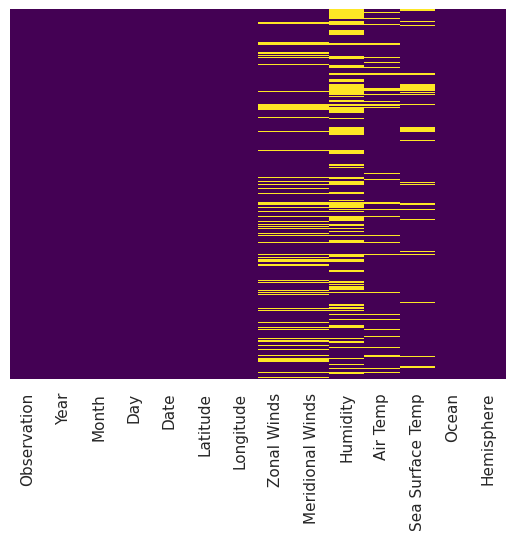

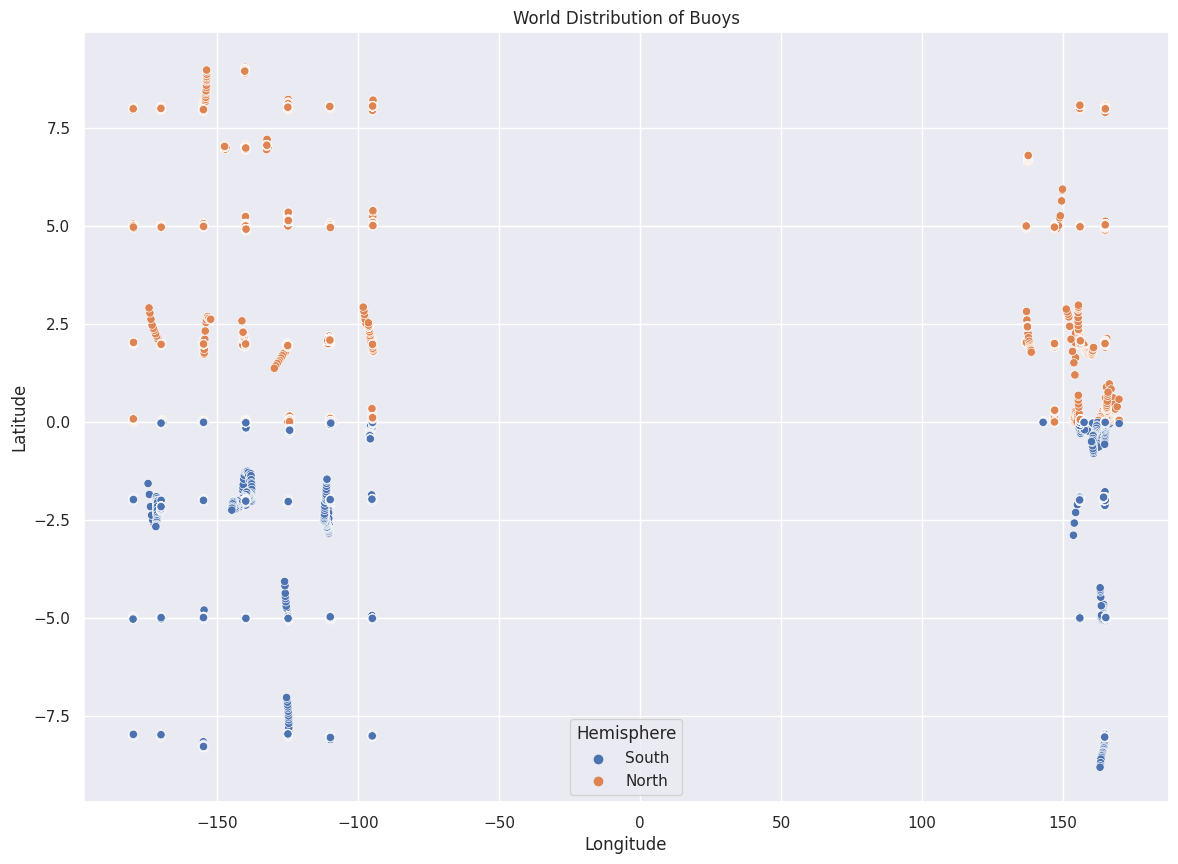

In [ ]:
# Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
# Loading Dataset
df_nino = pd.read_csv('/content/drive/MyDrive/Msc IT Project/Elnino.csv')

df_nino.head(10)

# Informations DataFrame

print('Informations of DataFrame:','\n')
print(df_nino.info(),'\n')

print('-'*100,'\n')

print('Description of DataFrame:','\n')
print(df_nino.describe())

print('-'*100,'\n')

print('Name of columns:', '\n')
print(df_nino.columns) #Have Spaces before the name of some columns

# Naming features

names = list(df_nino.columns)

for i in range(0,12):
    names[i] = names[i].lstrip()

df_nino.columns = names

# Changing missing values
df_nino.replace('.',np.nan,inplace = True)

# Changing object features for numerical features
## Changing
df_nino['Zonal Winds'] = pd.to_numeric(df_nino['Zonal Winds'], errors='coerce')
df_nino['Meridional Winds'] = pd.to_numeric(df_nino['Meridional Winds'], errors='coerce')
df_nino['Humidity'] = pd.to_numeric(df_nino['Humidity'], errors='coerce')
df_nino['Air Temp'] = pd.to_numeric(df_nino['Air Temp'], errors='coerce')
df_nino['Sea Surface Temp'] = pd.to_numeric(df_nino['Sea Surface Temp'], errors='coerce')

## Oceans and Hemispheres

### Oceans
df_nino['Ocean'] = df_nino['Longitude'] < 0.0
df_nino['Ocean'].replace([True,False],['Pacific','Indian'],inplace= True)
### Hemisphere
df_nino['Hemisphere'] = df_nino['Latitude'] < 0.0
df_nino['Hemisphere'].replace([True,False],['South','North'],inplace=True)

print(df_nino.info())

df_nino.describe()

#2- EDA and Visualization

sns.heatmap(df_nino.isnull(),cmap='viridis', cbar=False, yticklabels=False)
print(df_nino.isnull().sum())

df_nino.drop('Humidity', inplace= True, axis = 1)
df_nino.dropna(subset = ["Air Temp",'Sea Surface Temp'], inplace=True)

#2.1.1- Scatter plot

fig = plt.figure(figsize = (14,10))
plt.title('World Distribution of Buoys')
sns.scatterplot(x= 'Longitude',y= 'Latitude',data=df_nino,hue='Hemisphere')

